In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [2]:
# Get the current script's directory (assuming the notebook is in the 'notebooks' folder)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Set the project root directory (assuming the root is one level above 'notebooks')
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Change the working directory to the project root
os.chdir(project_root)

### Load the config.yaml file

In [3]:
with open(os.path.join(project_root, 'config.yaml'), "r") as file:
    config = yaml.safe_load(file)

### Set the data file paths from the config.yaml

In [4]:
data_files = config['data']

# Iterate through the data files to load each dataset
datasets = {}
for name, file_path in data_files.items():
    print(f"Loading dataset: {name}")
    datasets[name] = pd.read_csv(file_path)  # Read the dataset CSV file
    
    # Print the shape (number of rows and columns) of the loaded dataset
    print(datasets[name].shape)
    # Display the first 2 rows of the dataset to get a quick look at the data
    print(datasets[name].head(2))
    print("\n")

Loading dataset: gene_fusions
(1888, 13)
  gene_id_5prime gene_symbol_5prime chr_5prime gene_id_3prime  \
0      SIDG31561             RPL9P8         15      SIDG07923   
1      SIDG31561             RPL9P8         15      SIDG07923   

  gene_symbol_3prime chr_3prime   model_id model_name tissue  in_patient  \
0              ERAL1         17  SIDM00339    LXF-289   Lung       False   
1              ERAL1         17  SIDM00339    LXF-289   Lung       False   

  in_frame  in_cosmic_fusions                    dataset  
0       No              False  Sanger Cell Lines Fusions  
1       No              False  Sanger Cell Lines Fusions  


Loading dataset: copy_number_variation
(175, 778)
  Unnamed: 0  ABCB1  ABI1  ABL1  ABL2  ACKR3  ACSL3  ACVR1  ACVR2A  AFDN  ...  \
0  SIDM00046    2.0  -1.0  -1.0   0.0   -1.0   -1.0   -1.0    -1.0  -1.0  ...   
1  SIDM00047   -0.0  -0.0   0.0   0.0    0.0    0.0   -0.0    -1.0   0.0  ...   

   ZNF521  ZNF626  ZNF680  ZNF721  ZNF780A  ZNF814  ZNF93  ZN

In [5]:
# Perform basic statistical analysis for each dataset
for name, data in datasets.items():
    print(f"Basic Statistics for {name}:")
    print(data.describe())  # Get summary statistics for numerical columns
    print("\n")


Basic Statistics for gene_fusions:
       gene_id_5prime gene_symbol_5prime chr_5prime gene_id_3prime  \
count            1888               1888       1888           1888   
unique           1206               1206         24           1274   
top         SIDG26366               PVT1          1      SIDG21103   
freq               52                 52        262             14   

       gene_symbol_3prime chr_3prime   model_id model_name tissue in_patient  \
count                1888       1888       1888       1888   1888       1888   
unique               1274         23        175        175      1          2   
top                  MYCL          1  SIDM00758  NCI-H1993   Lung      False   
freq                   14        254         50         50   1888       1782   

       in_frame in_cosmic_fusions                    dataset  
count      1888              1888                       1888  
unique       10                 2                          1  
top          No         

<Figure size 1000x600 with 0 Axes>

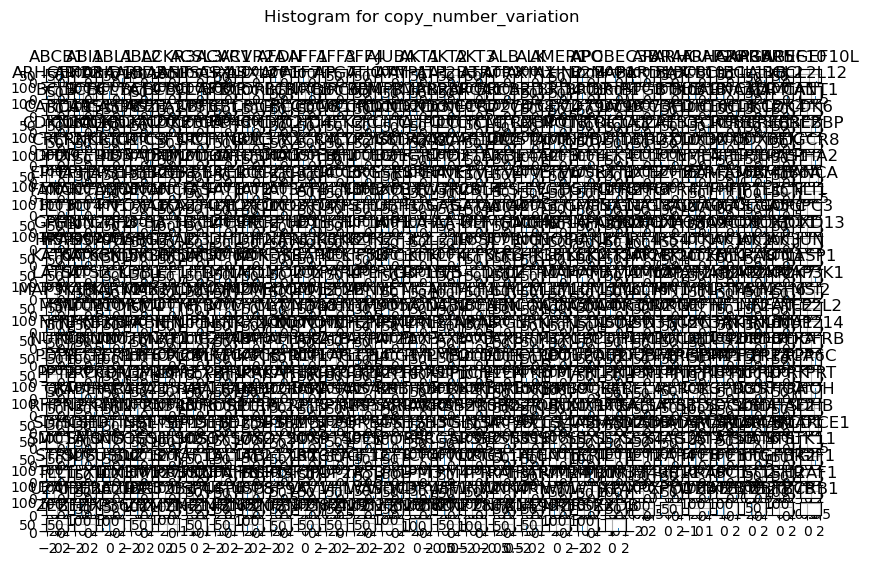

<Figure size 1000x600 with 0 Axes>

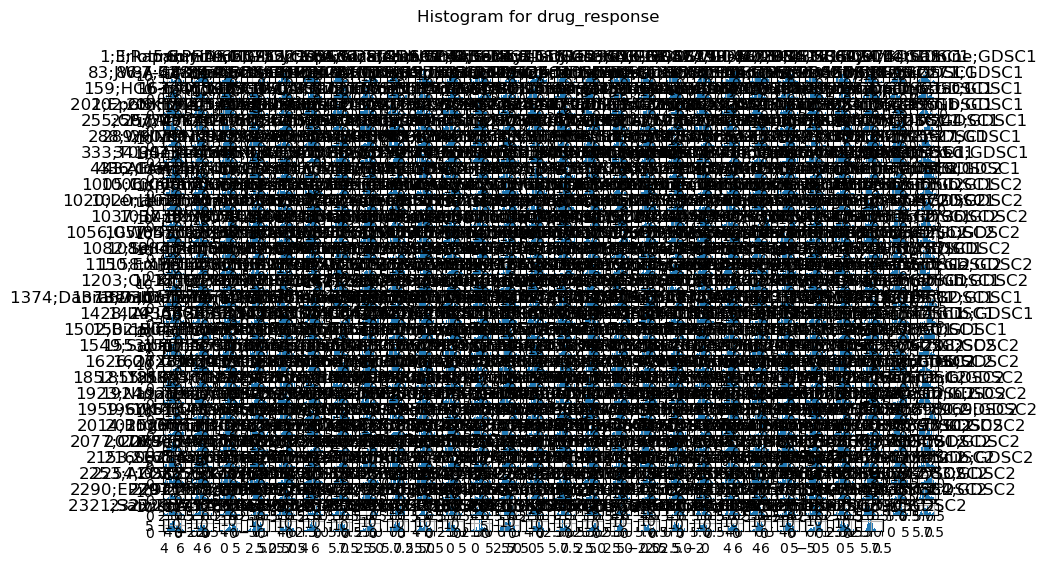

<Figure size 1000x600 with 0 Axes>

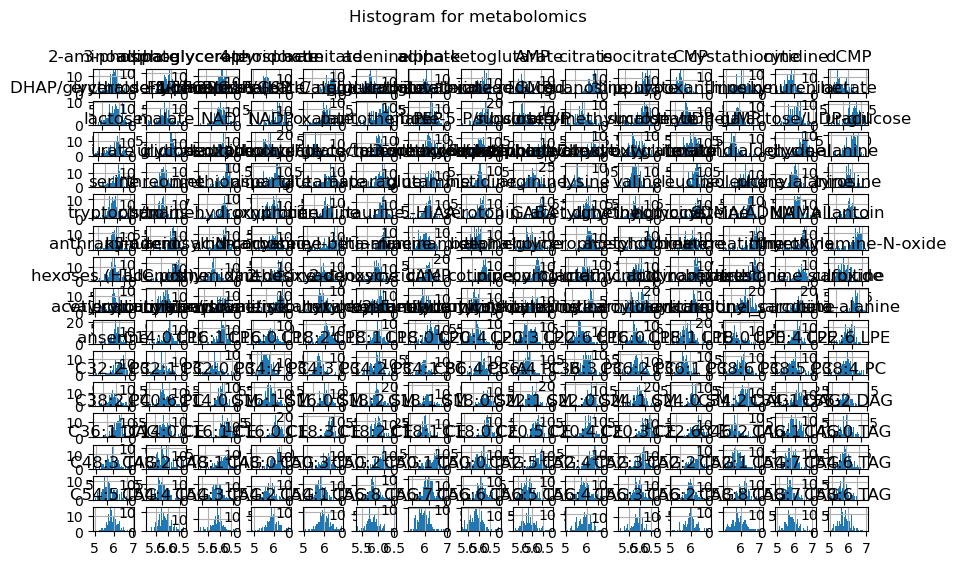

In [ ]:
# Display histograms to visualize the distribution of data
for idx, (name, data) in enumerate(datasets.items()):
    # Skip gene fusion dataset
    if idx == 0:
        continue
    plt.figure(figsize=(10, 6))
    data.hist(bins=50, figsize=(10, 6))  # Plot histograms for each dataset
    plt.suptitle(f"Histogram for {name}")
    plt.show()